In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
adwork_cust = pd.read_csv('AdvWorksCusts.csv')
adwork_cust.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [3]:
adwork_cust.columns = [str.replace('-', '_') for str in adwork_cust.columns]

In [4]:
adwork_cust.drop('AddressLine2', axis = 1, inplace = True)
adwork_cust.drop('MiddleName', axis = 1, inplace = True)
adwork_cust.drop('Suffix', axis = 1, inplace = True)
adwork_cust.drop('Title', axis = 1, inplace = True)



In [5]:
adwork_cust.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [6]:
(adwork_cust.astype(np.object) == 'NaN').any()

CustomerID              False
FirstName               False
LastName                False
AddressLine1            False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [7]:
adwork_cust.tail()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
16514,13121,Latasha,Jimenez,7259 Birchwood,Melton,Victoria,Australia,3337,1 (11) 500 555-0118,1965-03-22,Bachelors,Professional,F,M,1,4,5,5,101542
16515,26100,James,Ptaszynski,7345 Kenwal Rd.,Shawnee,British Columbia,Canada,V8Z 4N5,127-555-0194,1936-04-02,Partial College,Professional,F,S,1,2,0,3,46549
16516,11328,Julian,Griffin,7398 Withersed Lane,Newton,British Columbia,Canada,V2L3W8,636-555-0197,1940-01-01,Bachelors,Management,M,M,1,2,0,5,133053
16517,23077,Marvin,Hernandez,1019 Book Road,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0112,1946-10-20,High School,Skilled Manual,M,M,1,2,0,4,31930
16518,18982,Kyle,Baker,2118 Little Dr.,Kirkland,Washington,United States,98033,685-555-0144,1945-04-07,High School,Professional,M,S,1,2,0,4,59382


In [8]:
print(adwork_cust.shape)
print(adwork_cust.CustomerID.unique().shape)

(16519, 19)
(16404,)


In [9]:
adwork_cust.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

In [10]:
print(adwork_cust.shape)
print(adwork_cust.CustomerID.unique().shape)

(16404, 19)
(16404,)


In [11]:
cols = adwork_cust.columns
def count_unique(adwork_cust, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(adwork_cust[col].value_counts())
        
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag' , 'NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren']
count_unique(adwork_cust, cat_cols)


For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

For column NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

For column NumberChildrenAtHome
0    9924
1    2180
2    1455
3    1057
4     943
5     84

In [12]:
#order (from lowest to highest) that ranks the median YearlyIncome by Occupation
g = adwork_cust.groupby('Occupation').median()
g.nsmallest(5, 'YearlyIncome')

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
Occupation,,,,,,
Manual,20795.0,1.0,1.0,0.0,1.0,21722.0
Clerical,20877.0,1.0,1.0,0.0,1.0,49481.0
Skilled Manual,20273.5,1.0,1.0,0.0,1.0,66471.5
Professional,20229.5,1.0,2.0,1.0,2.0,99051.5
Management,19685.5,1.0,2.0,1.0,3.0,118781.0


In [13]:
#Average monthly spend by customerID
avemonth_spend = pd.read_csv('AW_AveMonthSpend.csv')
avemonth_spend.head(5)

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [14]:
from datetime import datetime
from datetime import date

adwork_cust = adwork_cust.rename(columns={"BirthDate": "Age"})


def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    date_year = 1998
    date_month = 1
    date_day = 1
    return date_year - born.year - ((date_month, date_day) < (born.month, born.day))

adwork_cust['Age'] = adwork_cust['Age'].apply(calculate_age)

adwork_cust.head()


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,31,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,32,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,32,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,29,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,29,Bachelors,Professional,F,S,1,4,5,5,92771


In [15]:
avemonth_spend.dropna()
avemonth_spend.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

print(avemonth_spend.shape)
print(adwork_cust.shape)

newdf = pd.merge(avemonth_spend, adwork_cust, how='left', on=['CustomerID'])
newdf.head()

(16404, 2)
(16404, 19)


,CustomerID,AveMonthSpend,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,89,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,31,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,117,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,32,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,123,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,32,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,50,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,29,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,95,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,29,Bachelors,Professional,F,S,1,4,5,5,92771


In [16]:
mask1 = (newdf['Gender'] == 'F') & (newdf['Age'] > 55)
mask2 = (newdf['Gender'] == 'M') & (newdf['Age'] > 55)
mask3 = (newdf['Gender'] == 'F') & (newdf['Age'] < 25)
mask4 = (newdf['Gender'] == 'M') & (newdf['Age'] < 25)
mask5 = (newdf['Gender'] == 'F') & (newdf['Age'] > 25) & (newdf['Age'] < 45)
mask6 = (newdf['Gender'] == 'M') & (newdf['Age'] > 25) & (newdf['Age'] > 45)

print('Females over 55 years of age   = ' + str(newdf[mask1]['AveMonthSpend'].median()))
print('Males over 55 years of age     = ' + str(newdf[mask2]['AveMonthSpend'].median()))
print('Females under 25 years of age  = ' + str(newdf[mask3]['AveMonthSpend'].median()))
print('Males under 25 years of age    = ' + str(newdf[mask4]['AveMonthSpend'].median()))
print('Females aged between 25 and 45 = ' + str(newdf[mask5]['AveMonthSpend'].median()))
print('Males aged between 25 and 45   = ' + str(newdf[mask6]['AveMonthSpend'].median()))


Females over 55 years of age   = 44.0
Males over 55 years of age     = 68.0
Females under 25 years of age  = 46.0
Males under 25 years of age    = 69.0
Females aged between 25 and 45 = 54.0
Males aged between 25 and 45   = 76.0


In [17]:
mask1 = (newdf['MaritalStatus'] == 'M')
mask2 = (newdf['MaritalStatus'] == 'S')

print('Married AveMonthSpend = ' + str(newdf[mask1]['AveMonthSpend'].median()))
print('Single AveMonthSpend  = ' + str(newdf[mask2]['AveMonthSpend'].median()))

Married AveMonthSpend = 74.0
Single AveMonthSpend  = 62.0


In [18]:
mask1 = (newdf['NumberCarsOwned'] == 0)
mask2 = (newdf['NumberCarsOwned'] > 2)

print('Customers with no car           = ' + str(newdf[mask1]['AveMonthSpend'].median()))
print('Customers with more than 2 cars = ' + str(newdf[mask2]['AveMonthSpend'].median()))

Customers with no car           = 65.0
Customers with more than 2 cars = 96.0


In [19]:
mask1 = (newdf['Gender'] == 'M')
mask2 = (newdf['Gender'] == 'F')

print('Male AveMonthSpend    = ' + str(newdf[mask1]['AveMonthSpend'].median()))
print('Female AveMonthSpend  = ' + str(newdf[mask2]['AveMonthSpend'].median()))

Male AveMonthSpend    = 79.0
Female AveMonthSpend  = 52.0


In [20]:
mask1 = (newdf['Gender'] == 'M')
mask2 = (newdf['Gender'] == 'F')

print('Male AveMonthSpend Range    = ' + str(newdf[mask1]['AveMonthSpend'].max() - newdf[mask1]['AveMonthSpend'].min()))
print('Female AveMonthSpend Range  = ' + str(newdf[mask2]['AveMonthSpend'].max() - newdf[mask2]['AveMonthSpend'].min()))

Male AveMonthSpend Range    = 147
Female AveMonthSpend Range  = 92


In [21]:
mask1 = (newdf['NumberChildrenAtHome'] == 0)
mask2 = (newdf['NumberChildrenAtHome'] > 0)

print('Customers with no children           = ' + str(newdf[mask1]['AveMonthSpend'].median()))
print('Customers with one or more children  = ' + str(newdf[mask2]['AveMonthSpend'].median()))

Customers with no children           = 57.0
Customers with one or more children  = 88.0


In [22]:
avemonth_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.389905
std,5340.370705,27.269568
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [23]:
aw_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
aw_bikebuyer.head(5)

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [24]:
aw_bikebuyer.groupby('BikeBuyer').size()

BikeBuyer
0    11030
1     5489
dtype: int64

In [25]:
aw_bikebuyer.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

In [26]:
print(aw_bikebuyer.shape)
print(adwork_cust.shape)


(16404, 2)
(16404, 19)


In [27]:
newdf = pd.merge(newdf, aw_bikebuyer, how='left', on=['CustomerID'])
newdf.head()

,CustomerID,AveMonthSpend,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,89,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,117,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,123,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,50,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,95,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,...,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [28]:
mask1 = (newdf['BikeBuyer'] == 0)
mask2 = (newdf['BikeBuyer'] == 1)

print('Avg. YearlyIncome for Did not buy a bike    = ' + str(newdf[mask1]['YearlyIncome'].median()))
print('Avg. YearlyIncome for Bought a bike         = ' + str(newdf[mask2]['YearlyIncome'].median()))

Avg. YearlyIncome for Did not buy a bike    = 65954.0
Avg. YearlyIncome for Bought a bike         = 96084.0


In [29]:
print('Avg. Cars Owned for Did not buy a bike    = ' + str(newdf[mask1]['NumberCarsOwned'].median()))
print('Avg. Cars Owned for Bought a bike         = ' + str(newdf[mask2]['NumberCarsOwned'].median()))

Avg. Cars Owned for Did not buy a bike    = 1.0
Avg. Cars Owned for Bought a bike         = 2.0


In [30]:
a = newdf[mask2].groupby('Occupation').agg(['count'])
a['BikeBuyer'].head()

,count
Occupation,
Clerical,616
Management,1016
Manual,504
Professional,2182
Skilled Manual,1133


In [31]:
mask1 = (newdf['Gender'] == 'M') & (newdf['BikeBuyer'] == 1)
mask2 = (newdf['Gender'] == 'F') & (newdf['BikeBuyer'] == 1)

print('Number of male customers who bought bike   = ' + str(newdf[mask1]['BikeBuyer'].agg(['count'])))
print('Number of female customers who bought bike = ' + str(newdf[mask2]['BikeBuyer'].agg(['count'])))

Number of male customers who bought bike   = count    3219
Name: BikeBuyer, dtype: int64
Number of female customers who bought bike = count    2232
Name: BikeBuyer, dtype: int64


In [32]:
mask1 = (newdf['MaritalStatus'] == 'M') & (newdf['BikeBuyer'] == 1)
mask2 = (newdf['MaritalStatus'] == 'S') & (newdf['BikeBuyer'] == 1)

print('Married customers who bought bike   = ' + str(newdf[mask1]['BikeBuyer'].agg(['count'])))
print('Single customers who bought bike    = ' + str(newdf[mask2]['BikeBuyer'].agg(['count'])))

Married customers who bought bike   = count    2196
Name: BikeBuyer, dtype: int64
Single customers who bought bike    = count    3255
Name: BikeBuyer, dtype: int64


In [33]:
newdf.drop(['CustomerID'], axis=1, inplace=True)
print(newdf.shape)
newdf.head()

(16404, 20)


,AveMonthSpend,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,89,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,31,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,117,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,32,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,123,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,32,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,50,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,29,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,95,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,29,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [34]:
newdf_count = newdf['BikeBuyer'].value_counts()
print(newdf_count)

0    10953
1     5451
Name: BikeBuyer, dtype: int64


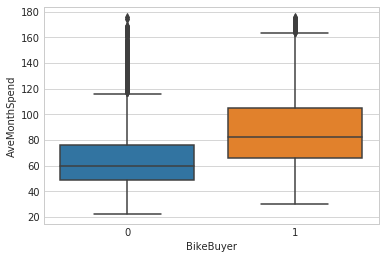

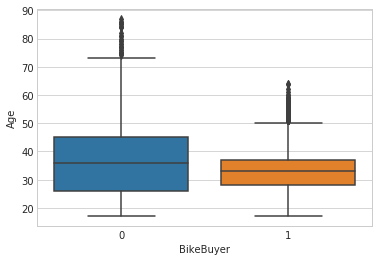

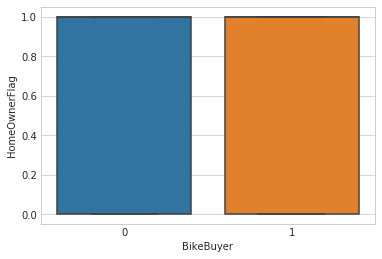

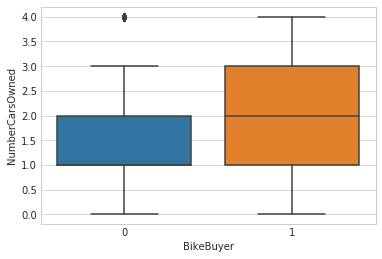

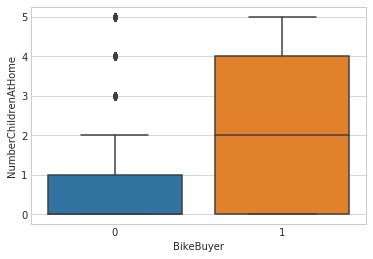

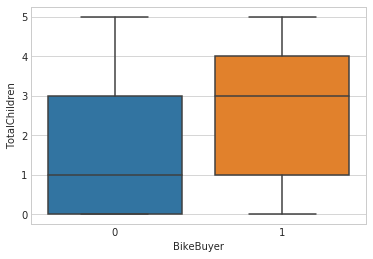

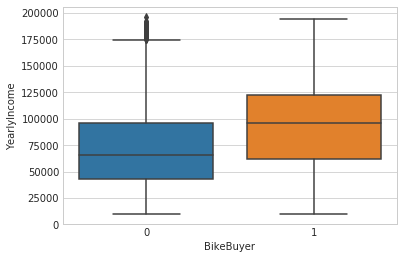

In [35]:
def plot_box(newdf, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=newdf)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['AveMonthSpend', 'Age', 'HomeOwnerFlag',
            'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']
plot_box(newdf, num_cols)

In [36]:
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 
                  'MaritalStatus']


CountryRegionName


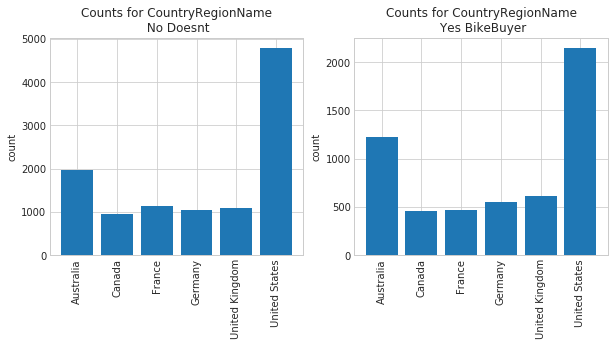

Education


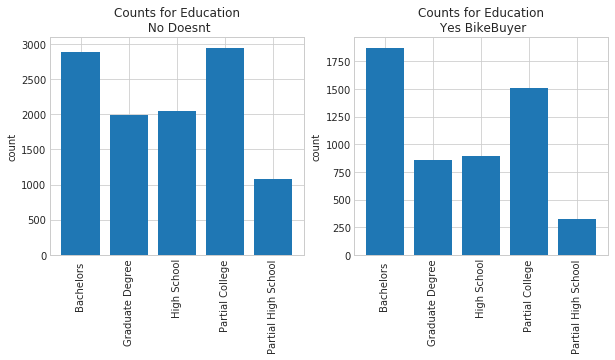

Occupation


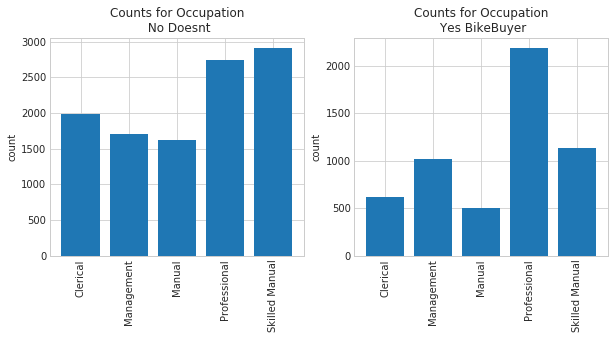

Gender


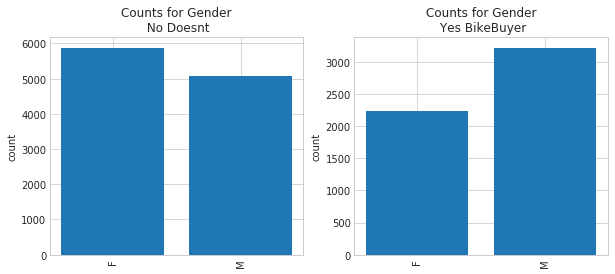

MaritalStatus


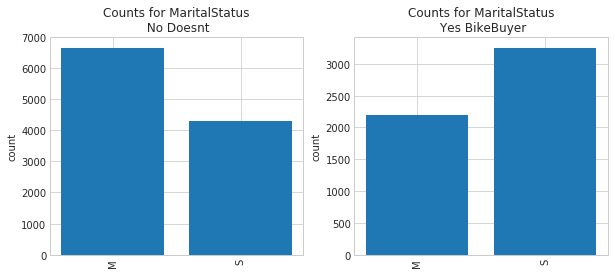

In [37]:
newdf['dummy'] = np.ones(shape = newdf.shape[0])

for col in cat_cols:
    print(col)
    counts = newdf[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n No Doesnt')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Yes BikeBuyer')
    plt.ylabel('count')
    plt.show()

In [38]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['MaritalStatus', 'Gender', 'Occupation', 
                       'Education' ]

Features = encode_string(newdf['CountryRegionName'])
Features2 = encode_string(newdf['CountryRegionName'])
for col in categorical_columns:
    temp = encode_string(newdf[col])
    Features = np.concatenate([Features, temp], axis = 1)
    Features2 = np.concatenate([Features2, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])   

(16404, 20)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


In [39]:
Features = np.concatenate([Features, np.array(newdf[['Age', 'HomeOwnerFlag',
            'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   


(16404, 26)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 3.10000e+01 1.00000e+00 0.00000e+00 0.00000e+00
  2.00000e+00 1.37947e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 3.20000e+01 0.00000e+00 1.00000e+00 3.00000e+00
  3.00000e+00 1.01141e+05]]


NameError: name 'awtest_df' is not defined

In [41]:
awtest_df = pd.read_csv('AW_test.csv')
awtest_df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [42]:
awtest_df.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

In [43]:
print(awtest_df.shape)
awtest_df = awtest_df.rename(columns={"BirthDate": "Age"})


def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    date_year = 1998
    date_month = 1
    date_day = 1
    return date_year - born.year - ((date_month, date_day) < (born.month, born.day))

awtest_df['Age'] = awtest_df['Age'].apply(calculate_age)

awtest_df.head()

(500, 23)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,52,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,33,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,63,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,39,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,32,High School,Manual,F,M,1,1,2,2,21876


In [44]:
awtest_df.drop('AddressLine2', axis = 1, inplace = True)
awtest_df.drop('MiddleName', axis = 1, inplace = True)
awtest_df.drop('Suffix', axis = 1, inplace = True)
awtest_df.drop('Title', axis = 1, inplace = True)
awtest_df.drop('CustomerID', axis = 1, inplace = True)

In [45]:
awtest_df.dropna()



,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,52,Bachelors,Management,F,S,0,2,0,5,86931
1,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,33,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,63,Graduate Degree,Management,F,M,1,2,0,4,103985
3,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,39,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,32,High School,Manual,F,M,1,1,2,2,21876
5,Gabriella,Hernandez,5689 Almondtree Circle,Spring Valley,California,United States,91977,165-555-0161,40,Partial College,Clerical,F,M,1,1,0,1,44467
6,Adam,Turner,9800 American Beauty Dr.,N. Vancouver,British Columbia,Canada,V7L 4J4,222-555-0116,33,Bachelors,Skilled Manual,M,S,1,2,2,4,77702
7,Marco,Prasad,8523 Rose Drive,Cranbourne,Victoria,Australia,3977,1 (11) 500 555-0165,33,Bachelors,Professional,M,M,1,3,4,4,99418
8,Clayton,Raje,"4, place du Tertre",Tremblay-en-France,Seine Saint Denis,France,93290,1 (11) 500 555-0188,31,Partial High School,Manual,M,S,1,1,4,4,13522
9,Kristina,Arun,Waldstr 29,Hannover,Nordrhein-Westfalen,Germany,30601,1 (11) 500 555-0186,24,Bachelors,Skilled Manual,F,M,1,1,1,1,46264


In [46]:
Features2 = encode_string(awtest_df['CountryRegionName'])
for col in categorical_columns:
    temp = encode_string(awtest_df[col])
    Features2 = np.concatenate([Features2, temp], axis = 1)
    
print(Features2.shape)
print(Features2[:2, :])

(500, 20)
[[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]


In [47]:
Features2 = np.concatenate([Features2, np.array(awtest_df[['Age', 'HomeOwnerFlag',
            'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']])], axis = 1)
print(Features2.shape)
print(Features2[:2, :]) 

(500, 26)
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 5.20000e+01 0.00000e+00 2.00000e+00 0.00000e+00
  5.00000e+00 8.69310e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 3.30000e+01 1.00000e+00 2.00000e+00 2.00000e+00
  4.00000e+00 1.00125e+05]]


In [48]:

labels = aw_bikebuyer['BikeBuyer']
print(labels)


0        0
1        1
2        0
3        0
4        1
5        1
6        1
7        1
8        1
9        0
10       0
11       1
12       1
13       0
14       0
15       0
16       0
17       1
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
16478    0
16479    0
16480    0
16481    0
16482    0
16483    1
16484    0
16485    0
16486    0
16487    0
16488    0
16489    0
16490    0
16491    0
16492    0
16493    0
16494    0
16495    1
16496    0
16497    0
16498    0
16499    0
16500    0
16501    0
16502    0
16503    0
16504    0
16505    1
16506    0
16507    0
Name: BikeBuyer, Length: 16404, dtype: int64


In [49]:
X_train = Features
y_train = labels
X_test = Features2

In [50]:
scaler = preprocessing.StandardScaler().fit(X_train[:,19:])
X_train[:,19:] = scaler.transform(X_train[:,19:])
scaler = preprocessing.StandardScaler().fit(X_test[:,19:])
X_test[:,19:] = scaler.transform(X_test[:,19:])
X_train[:2,]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        , -0.30546432,
        -0.39556118,  0.69530633, -1.31661475, -0.6545231 , -0.00268156,
         1.50580197],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        , -0.30546432,
        -0.30660425, -1.43821501, -0.43872887,  1.32667944,  0.59175452,
         0.57928966]])

In [51]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.87989767 0.12010233]
 [0.4482632  0.5517368 ]
 [0.98061953 0.01938047]
 [0.76829077 0.23170923]
 [0.88041371 0.11958629]
 [0.97159836 0.02840164]
 [0.19305701 0.80694299]
 [0.22681532 0.77318468]
 [0.20985033 0.79014967]
 [0.84179551 0.15820449]
 [0.62611623 0.37388377]
 [0.94438881 0.05561119]
 [0.94408123 0.05591877]
 [0.9686467  0.0313533 ]
 [0.75969466 0.24030534]]


In [82]:
print(probabilities[:,1])

[0.12010233 0.5517368  0.01938047 0.23170923 0.11958629 0.02840164
 0.80694299 0.77318468 0.79014967 0.15820449 0.37388377 0.05561119
 0.05591877 0.0313533  0.24030534 0.08387445 0.20465682 0.26699797
 0.94511055 0.42640222 0.06226225 0.14114848 0.902444   0.20667412
 0.11900818 0.20445764 0.26320613 0.91784224 0.4653559  0.10016008
 0.71852841 0.46308314 0.01282028 0.23216999 0.65484261 0.8563216
 0.89033196 0.32741908 0.1446977  0.26976008 0.33487064 0.446653
 0.18882102 0.07112974 0.17580623 0.09787851 0.11266876 0.86737158
 0.55372673 0.14521598 0.05681398 0.56428613 0.28570325 0.03178198
 0.0295184  0.13595376 0.06234808 0.44409091 0.02100728 0.38781916
 0.0737293  0.0211393  0.15358206 0.77989711 0.29238187 0.82998912
 0.62123138 0.77213353 0.24386879 0.66527694 0.47485966 0.0202479
 0.1525693  0.03177505 0.14265633 0.73108049 0.93002002 0.64398593
 0.19359726 0.06403965 0.50480701 0.28583384 0.06007428 0.5821765
 0.21721966 0.02645581 0.24680747 0.89845492 0.77754292 0.07862945


In [53]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = np.array(score_model(probabilities, 0.5))[np.newaxis]
a = scores.T
print(a)
np.savetxt("foo.csv", a.astype(int), delimiter=" ")

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]


In [72]:
newdf.drop('AddressLine1', axis = 1, inplace = True)
newdf.drop('City', axis = 1, inplace = True)
newdf.drop('LastName', axis = 1, inplace = True)
newdf.drop('StateProvinceName', axis = 1, inplace = True)
newdf.drop('FirstName', axis = 1, inplace = True)
newdf.drop('CountryRegionName', axis = 1, inplace = True)
newdf.drop('PhoneNumber', axis = 1, inplace = True)
newdf.drop('PostalCode', axis = 1, inplace = True)

newdf.head()

,AveMonthSpend,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,dummy
0,89,31,Bachelors,Professional,M,M,1,0,0,2,137947,0,1.0
1,117,32,Bachelors,Professional,M,S,0,1,3,3,101141,1,1.0
2,123,32,Bachelors,Professional,M,M,1,1,3,3,91945,0,1.0
3,50,29,Bachelors,Professional,F,S,0,1,0,0,86688,0,1.0
4,95,29,Bachelors,Professional,F,S,1,4,5,5,92771,1,1.0


In [73]:
newdf.drop('dummy', axis = 1, inplace = True)
newdf.drop('BikeBuyer', axis = 1, inplace = True)

In [74]:
newdf.head()

,AveMonthSpend,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,89,31,Bachelors,Professional,M,M,1,0,0,2,137947
1,117,32,Bachelors,Professional,M,S,0,1,3,3,101141
2,123,32,Bachelors,Professional,M,M,1,1,3,3,91945
3,50,29,Bachelors,Professional,F,S,0,1,0,0,86688
4,95,29,Bachelors,Professional,F,S,1,4,5,5,92771


In [77]:
newdf.to_csv('newdf3.csv', header=True, columns=["AveMonthSpend","Age", "Education", "Occupation", "Gender", "MaritalStatus", "HomeOwnerFlag", "NumberCarsOwned", "NumberChildrenAtHome", "TotalChildren", "YearlyIncome"], index=False)

In [78]:
awtest_df.drop('AddressLine1', axis = 1, inplace = True)
awtest_df.drop('City', axis = 1, inplace = True)
awtest_df.drop('LastName', axis = 1, inplace = True)
awtest_df.drop('StateProvinceName', axis = 1, inplace = True)
awtest_df.drop('FirstName', axis = 1, inplace = True)
awtest_df.drop('CountryRegionName', axis = 1, inplace = True)
awtest_df.drop('PhoneNumber', axis = 1, inplace = True)
awtest_df.drop('PostalCode', axis = 1, inplace = True)

awtest_df.head()

,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,52,Bachelors,Management,F,S,0,2,0,5,86931
1,33,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,63,Graduate Degree,Management,F,M,1,2,0,4,103985
3,39,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,32,High School,Manual,F,M,1,1,2,2,21876


In [79]:
awtest_df.to_csv('testdf.csv', header=True, columns=["Age", "Education", "Occupation", "Gender", "MaritalStatus", "HomeOwnerFlag", "NumberCarsOwned", "NumberChildrenAtHome", "TotalChildren", "YearlyIncome"], index=False)